In [ ]:
import numpy as np


In [ ]:
def feature_scaling(data, pre_data=None):
  '''
    Param data: matrics
    Param pre_data: null or matrics
  '''
  n = len(data[0])
  changedData = np.array([[] for i in range(len(data))])
  for i in range(n):
    column = data[:, i]
    cal_column = column if (pre_data is None) else pre_data[:, i]
    # print('column', i, column)
    scaling_column = ((column - np.average(cal_column)) / (np.max(cal_column) - np.min(cal_column))).reshape(-1, 1)
    changedData = np.c_[changedData, scaling_column]
  return changedData

In [ ]:
 # eta: learning rate
 # lam: regularisation parameter
def logistic_batch_gradient_descent(X, y, eta, iterations, lam=0):
  """"using regularise batch gradient descent to calculte the theta
    Param X: Metrics
    Param y: metrics
    Param eta: learning rate
    Param iterations: iterate times
    Param lam: regularisation param

    Return the optimal theta
  """
  m = len(X)
  X_b = np.c_[np.ones((m, 1)), X]
  n = len(X_b[0])
  theta = np.zeros((n, 1))
  for i in range(iterations):
    predict_value = X_b.dot(theta)
    SIG = 1 / (1 + np.exp(-predict_value))
    regularisation = lam * np.array([[0], *theta[1:]])
    theta = theta - eta*(1/m) * (X_b.T.dot(SIG - y) + regularisation )
  return theta


In [ ]:
def logistic_cost_function(X, y, theta):
  """calculate cost function
  Param X: 2D dimentions
  Param y: 2D dimentions
  Param theta: Metrics
  Param lam: the regularisation param
  
  Return: the value of the cost function
  """
  m = len(X)
  X_b = np.c_[np.ones((m, 1)), X]
  predict_value = X_b.dot(theta)
  SIG = 1 / (1 + np.exp(-predict_value))
  cal_theta = np.array([[0], *theta[1:]])
  J = -1/(m) * (sum(y.T.dot(np.log(SIG)) + (1 - y).T.dot(np.log(1-SIG))))
  # accuracy = (SIG + y)[, :]
  trueValue = ((SIG + y) < 0.5) | ((SIG + y) >= 1.5)
  print(len(SIG[trueValue]), len(SIG))
  accuracy = len(SIG[trueValue])/len(SIG)
  return J[0], accuracy


In [ ]:
data =np.array([
                [0, 400],
                [0, 200],
                [1, 350],
                [0, 150],
                [1, 600],
                [1, 450],
                [0, 100],
                [1, 500],
                [1, 1000]
])


In [ ]:
X = feature_scaling(data[:, 1].reshape(-1, 1))
y = data[:, 0].reshape(-1, 1)
learning_rate = .1
iterations = 10000
print(X, y)

[[-0.01851852]
 [-0.24074074]
 [-0.07407407]
 [-0.2962963 ]
 [ 0.2037037 ]
 [ 0.03703704]
 [-0.35185185]
 [ 0.09259259]
 [ 0.64814815]] [[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [ ]:
cal_theta = logistic_batch_gradient_descent(X, y, learning_rate, iterations)
cal_theta
results = logistic_cost_function(X, y, cal_theta)
print('theta: {}, cost: {}, accuracy: {}'.format(cal_theta, *results))
print(X, y)

7 9
theta: [[ 0.9711529]
 [13.9702667]], cost: 0.2565592844216175, accuracy: 0.7777777777777778
[[-0.01851852]
 [-0.24074074]
 [-0.07407407]
 [-0.2962963 ]
 [ 0.2037037 ]
 [ 0.03703704]
 [-0.35185185]
 [ 0.09259259]
 [ 0.64814815]] [[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [ ]:
new_feature = np.array([
               15000,
               35000,
               60000,
               35000,
               70000,
               40000,
               36000,
               22000,
               42000            
])
X2 = feature_scaling(np.c_[X, new_feature])
X2

array([[-0.01851852, -0.44444444],
       [-0.24074074, -0.08080808],
       [-0.07407407,  0.37373737],
       [-0.2962963 , -0.08080808],
       [ 0.2037037 ,  0.55555556],
       [ 0.03703704,  0.01010101],
       [-0.35185185, -0.06262626],
       [ 0.09259259, -0.31717172],
       [ 0.64814815,  0.04646465]])

In [ ]:
cal_theta2 = logistic_batch_gradient_descent(X2, y, learning_rate, iterations)
results2 = logistic_cost_function(X2, y, cal_theta2)
print('theta: {}, cost: {}, accuracy: {}'.format(cal_theta2, *results2))
print(X2, y)

9 9
theta: [[ 2.10280501]
 [16.39035914]
 [ 7.56251856]], cost: 0.07387858027698649, accuracy: 1.0
[[-0.01851852 -0.44444444]
 [-0.24074074 -0.08080808]
 [-0.07407407  0.37373737]
 [-0.2962963  -0.08080808]
 [ 0.2037037   0.55555556]
 [ 0.03703704  0.01010101]
 [-0.35185185 -0.06262626]
 [ 0.09259259 -0.31717172]
 [ 0.64814815  0.04646465]] [[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]


In [ ]:
newData = np.array([
           [1, 700, 50000],
           [0, 400, 20000],
           [1, 400, 40000],
           [0, 200, 55000]
])
X3 = feature_scaling(newData[:, 1:], pre_data=np.c_[data[:, 1], new_feature])
y3 = newData[:, 0].reshape(-1, 1)

In [ ]:
logistic_cost_function(X3, y3, cal_theta2)

3 4


(0.3358439562821681, 0.75)

### 使用sklearn实现一遍

[0.22927873] [[0.75184876 0.53955903]]
accuracy 0.89
accuracy 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5

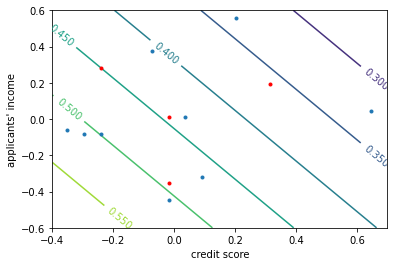

In [ ]:
# 第三问
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X2, y)
print(logReg.intercept_, logReg.coef_)
logTheta = np.c_[logReg.intercept_, logReg.coef_].reshape(-1, 1)

import matplotlib.pyplot as plt

plt.plot(X2[:, 0], X2[:, 1], '.')
plt.xlabel('credit score')
plt.ylabel('applicants\' income')

X1_new, X2_new = np.meshgrid(
    np.linspace(-0.4, 0.7, 200).reshape(-1, 1),
    np.linspace(-.6, .6, 200).reshape(-1, 1)
)
X_new = np.c_[X1_new.reshape(-1, 1), X2_new.reshape(-1, 1)]
y_new = logReg.predict_proba(X_new)

contour = plt.contour(X1_new, X2_new, y_new[:, 0].reshape(X1_new.shape))
plt.clabel(contour)
plt.axis([-0.4, .7, -0.6, .6])

def cal_accuracy(y, predict_y):
  cal_right = 0
  for i in range(len(y)):
    if predict_y[i] == y[i]:
      cal_right +=1
  accuracy = round(cal_right/len(y), 2)
  print('accuracy', accuracy)
  return accuracy

y2_predict = logReg.predict(X2)
cal_accuracy(y, y2_predict)

# predict new data for testing
y3_predict = logReg.predict(X3)
plt.plot(X3[:, 0], X3[:, 1], 'r.')
cal_accuracy(y3, y3_predict)